## WOA Dissolved Oxygen: 
The total amount of dissolved oxygen in the ocean. This can fluctuate based on geochemical processes like marine productivity, oxidation, and respiration. It is also controlled by processes like gas solubility, mixing at depths, and anthropogenic effects. WOA provides dissolved O2 on different time scales. 

## WOA Apparent Oxygen Utilization: 
% oxygen satuation minus actual dissolved oxygen. 

## WOA Percent Oxygen Saturation: 
The actual amount of dissolved oxygen in the ocean vs maximum amount.

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cmocean 

from matplotlib import pyplot as plt
import matplotlib.path as mpath 
from cartopy import crs as ccrs, feature as cfeature 
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
woa18_o2 = xr.open_zarr('../data/woa18/woa_oxygen_dissolved_all',decode_times=False).dissolved
woa18_o2_sat = xr.open_zarr('../data/woa18/woa_oxygen_saturation_all',decode_times=False).oxygen_saturation
woa18_aou = xr.open_zarr('../data/woa18/woa_aou_all',decode_times=False).aou

In [4]:
woa18_o2

<xarray.DataArray 'dissolved' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-dissolved, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for mole_concentration_o...
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          micromoles_per_kilogram

In [5]:
woa18_o2_sat

<xarray.DataArray 'oxygen_saturation' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-oxygen_saturation, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for fractional_saturatio...
    standard_name:  fractional_saturation_of_oxygen_in_seawater
    units:          percent

In [6]:
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

In [7]:
#separating all the ocean basins
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) 
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2))
pacificocean = (woa18_basins.where(woa18_basins==3) / woa18_basins.where(woa18_basins==3))
arcticocean = (woa18_basins.where(woa18_basins==4) / woa18_basins.where(woa18_basins==4))
indianocean = (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==5))

In [8]:
def North_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.NorthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap,levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, 65, 90], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

In [14]:
woa18_aou_arctic

NameError: name 'woa18_aou_arctic' is not defined

Text(0.5, 1.0, 'WOA18 AOU Arctic Ocean at Surface')

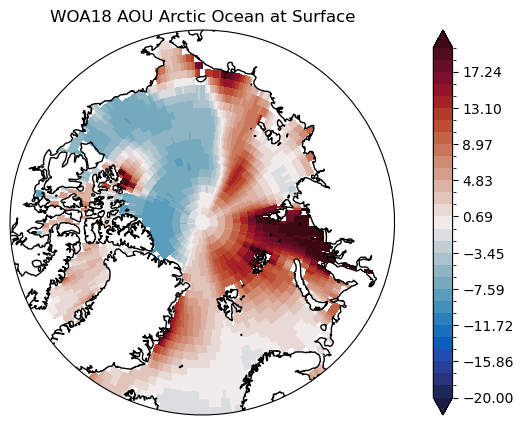

In [25]:
North_Polar(woa18_aou_arctic.isel(depth=0),-20,20,cmocean.cm.balance)
plt.title('WOA18 AOU Arctic Ocean at Surface')

Text(0.5, 1.0, 'WOA18 O2 Arctic Ocean at Surface')

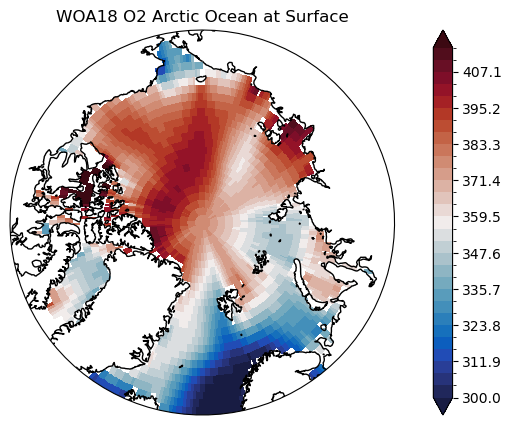

In [26]:
North_Polar(woa18_o2_arctic.isel(depth=0),300,415,cmocean.cm.balance)
plt.title('WOA18 O2 Arctic Ocean at Surface')

Text(0.5, 1.0, 'WOA18 O2 Sat Ocean at Surface')

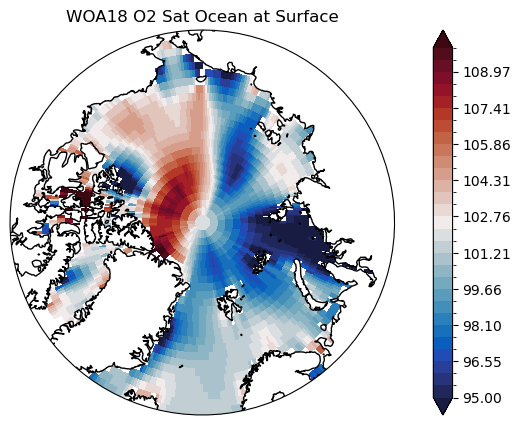

In [27]:
North_Polar(woa18_o2sat_arctic.isel(depth=0),95,110,cmocean.cm.balance)
plt.title('WOA18 O2 Sat Ocean at Surface')

Text(0.5, 1.0, 'Ocean Basin Mask')

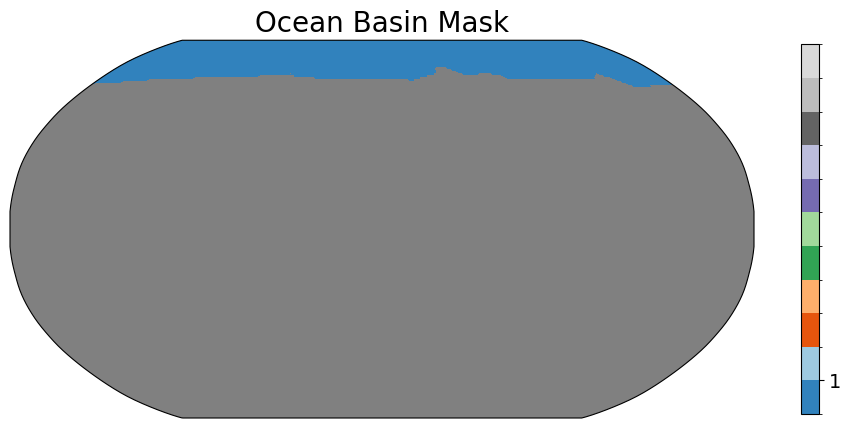

In [28]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = arcticocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [9]:
woa18_aou_arctic = woa18_aou*arcticocean
woa18_o2_arctic = woa18_o2*arcticocean
woa18_o2sat_arctic = woa18_o2_sat*arcticocean

In [121]:
woa02_molkg=woa18_o2.mean(dim='lon')/1000

Text(0.5, 1.0, 'Historical Zonal Averaged Dissolved Oxygen Content')

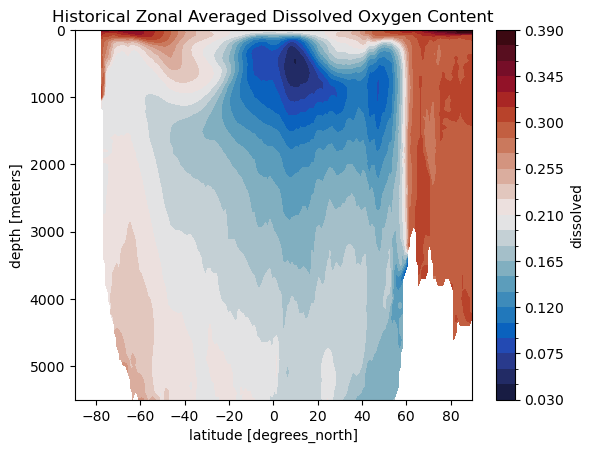

In [122]:
zonal_woa18_o2= woa02_molkg.plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False,levels=30)
plt.title('Historical Zonal Averaged Dissolved Oxygen Content')

In [127]:
woa02sat_mgkg = woa18_o2_sat.mean(dim='lon')/1000
#converting from micromols/kg to mols/kg

Text(0.5, 1.0, 'Historical Zonal Average Saturated Oxygen Content')

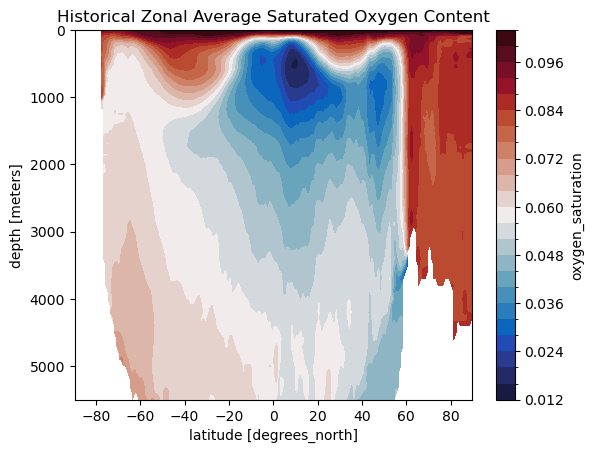

In [129]:
zonal_woa18_o2sat= woa02sat_mgkg.plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False,levels=30)
plt.title('Historical Zonal Average Saturated Oxygen Content')

In [130]:
aou_molkg = woa18_aou.mean(dim='lon')/1000

Text(0.5, 1.0, 'Historical Zonal Averaged of AOU Content')

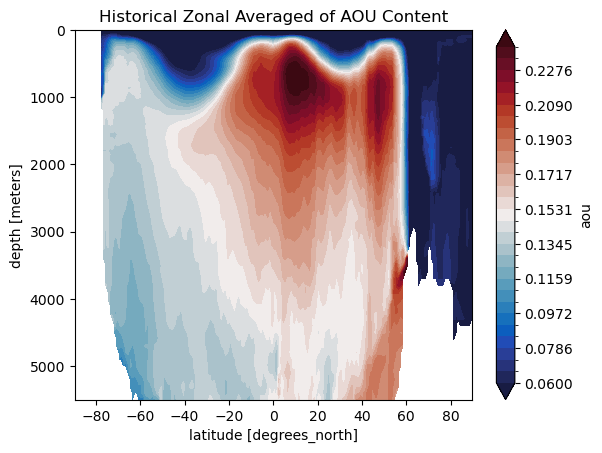

In [137]:
zonal_woa18_aou= aou_molkg.plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=.06, vmax=.24, levels=30)
plt.title('Historical Zonal Averaged of AOU Content')

## Figure 2. 
    Historical Zonal Averaged Dissolved Oxygen, Oxygen Saturation, and Apparent Oxygen Utilization (AOU) Across Depth. Longitudinal values were averaged to produce the plots above. AOU is in mol/kg, Oxygen saturation is in %, and Dissolved Oxygen is in mol/kg. Dissolved Oxygen and Oxygen Saturation are highest near the Northern and Southern Poles, and lowest at the Equator. Similarly to Figure 1, the inverse is true for Apparent Oxygen Utilization, where it is highest at the equator and lowest at the poles due to oxygen sinks (North Atlantic Deep Water and Antarctic Bottom Water) holding mass amounts of oxygen at depths, unavailable for biologic utilization. Plots above were produced using the World Ocean Atlas (WOA18) dataset. 

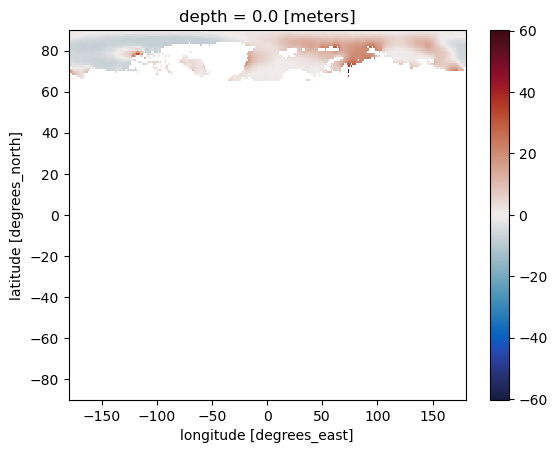

In [33]:
woa18_aou_arctic.isel(depth=0).plot(cmap=cmocean.cm.balance)

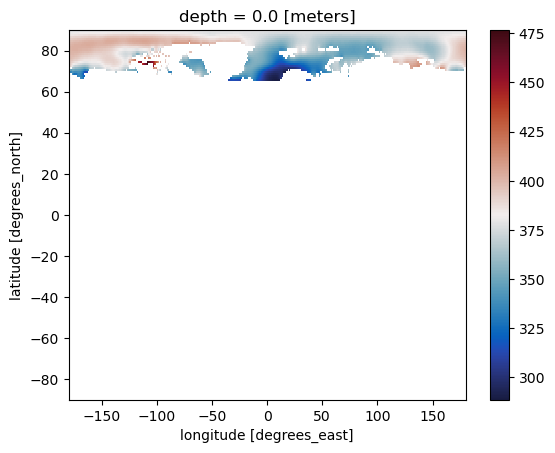

In [34]:
woa18_o2_arctic.isel(depth=0).plot(cmap=cmocean.cm.balance)

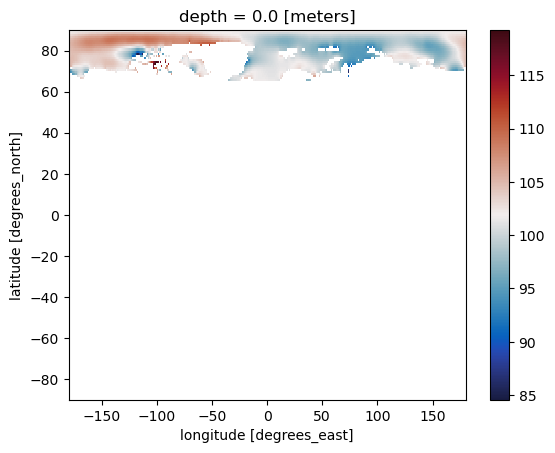

In [35]:
woa18_o2sat_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance)

Text(0.5, 1.0, 'WOA AOU [μmol/kg]')

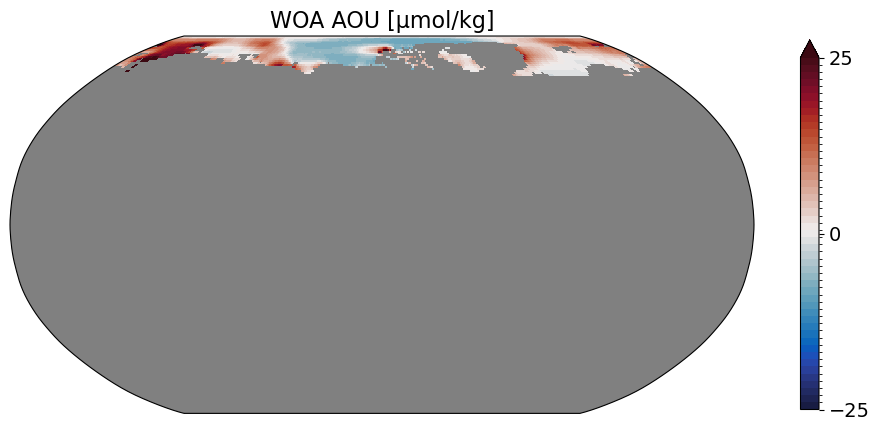

In [36]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_aou_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=-25, vmax=25, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 [μmol/kg]')

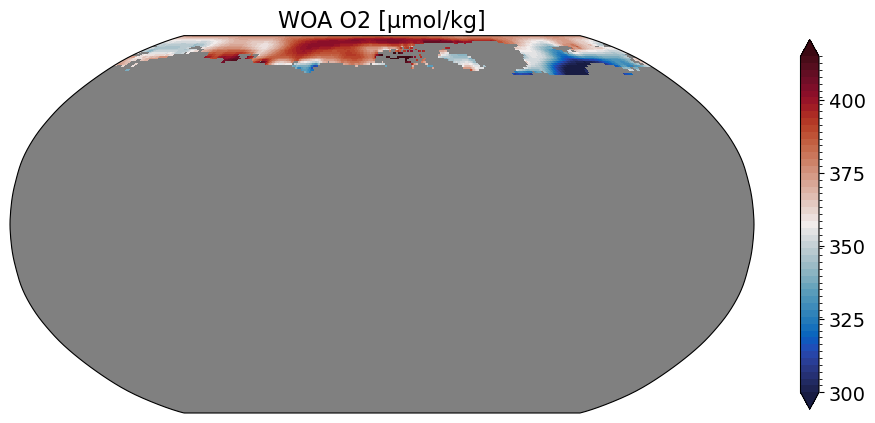

In [37]:
#arctic dissolved oxygen map
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_o2_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=300, vmax=415, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[300,325,350,375,400,425], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Sat [μmol/kg]')

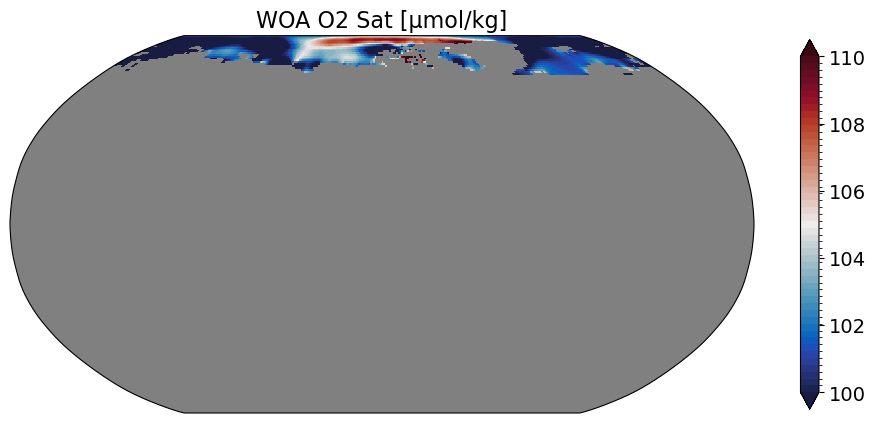

In [38]:
#arctic oxygen saturation map
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_o2sat_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=100, vmax=110, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[100,102,104,106,108,110], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'Ocean Basin Mask')

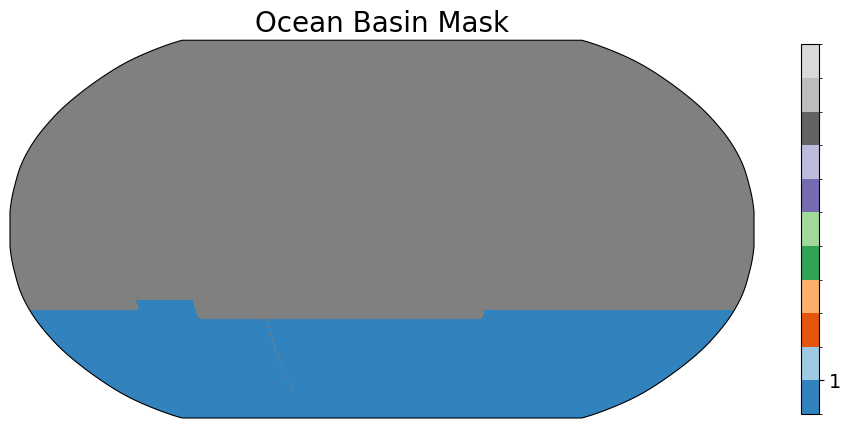

In [39]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = southernocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [10]:
def South_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

Text(0.5, 1.0, 'WOA18 AOU Southern Ocean at 500 Meters')

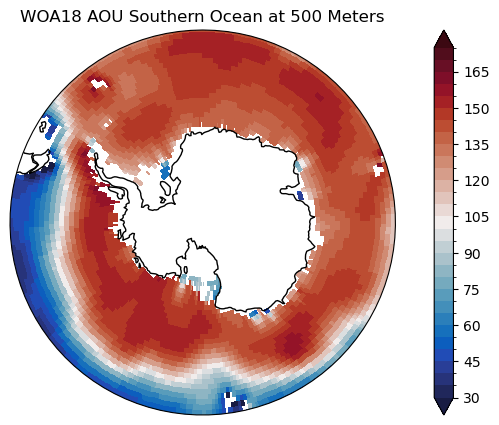

In [47]:
South_Polar(woa18_aou_southernocean.isel(depth=37),30,175,cmocean.cm.balance)
plt.title('WOA18 AOU Southern Ocean at 500 Meters')

Text(0.5, 1.0, 'WOA18 O2 at Southern Ocean at 500 Meters')

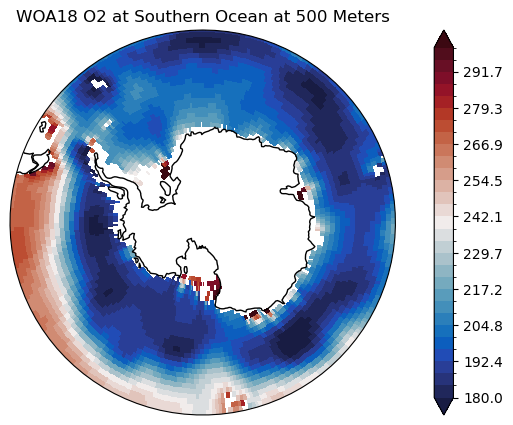

In [52]:
South_Polar(woa18_o2_southernocean.isel(depth=37),180,300,cmocean.cm.balance)
plt.title('WOA18 O2 at Southern Ocean at 500 Meters')

Text(0.5, 1.0, 'WOA18 O2 SAT Southern Ocean at 500 Meters')

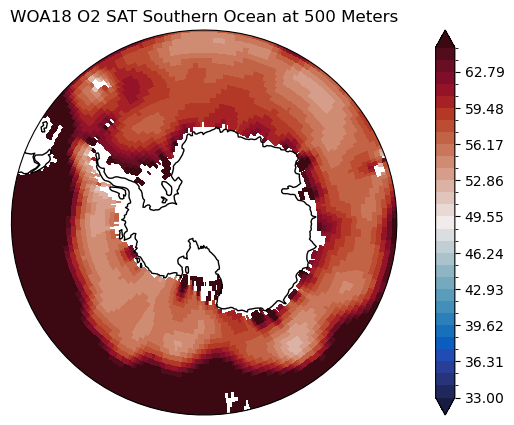

In [57]:
South_Polar(woa18_o2sat_southernocean.isel(depth=37),33,65,cmocean.cm.balance)
plt.title('WOA18 O2 SAT Southern Ocean at 500 Meters')

In [33]:
woa18_aou_southernocean = woa18_aou*southernocean
woa18_o2_southernocean = woa18_o2*southernocean
woa18_o2sat_southernocean = woa18_o2_sat*southernocean

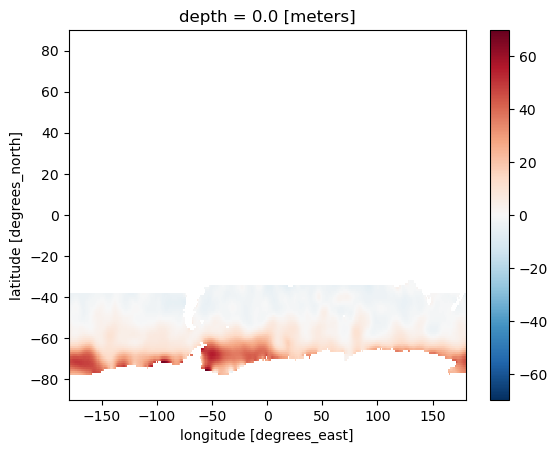

In [45]:
woa18_aou_southernocean.isel(depth=0).plot()

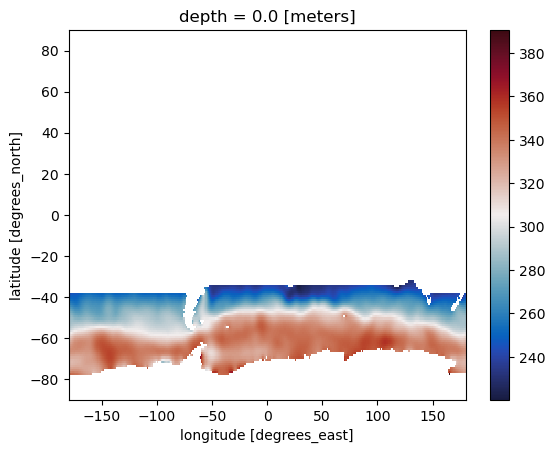

In [46]:
woa18_o2_southernocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

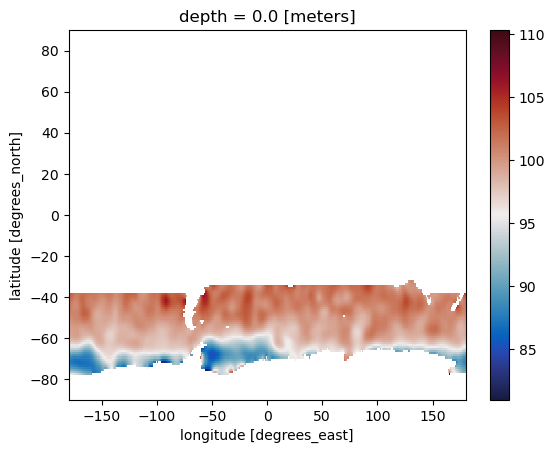

In [47]:
woa18_o2sat_southernocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

Text(0.5, 1.0, 'WOA O2 Sat Southern Ocean [μmol/kg]')

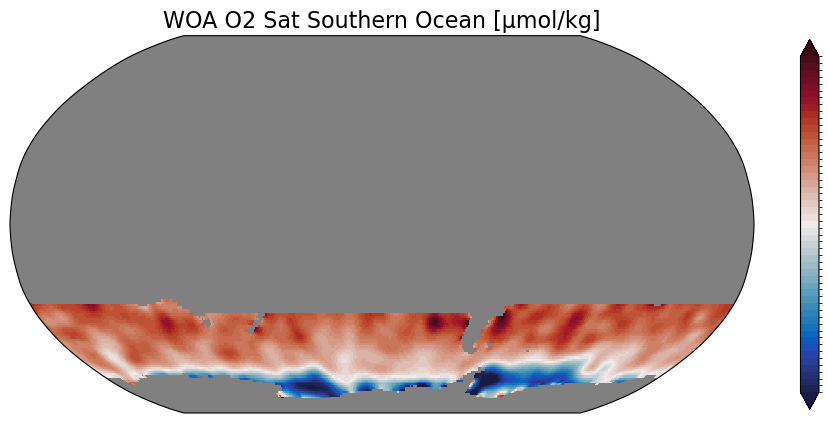

In [48]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2satS = woa18_o2sat_southernocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=87, vmax=106, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2satS, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat Southern Ocean [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA AOU by Basin [μmol/kg]')

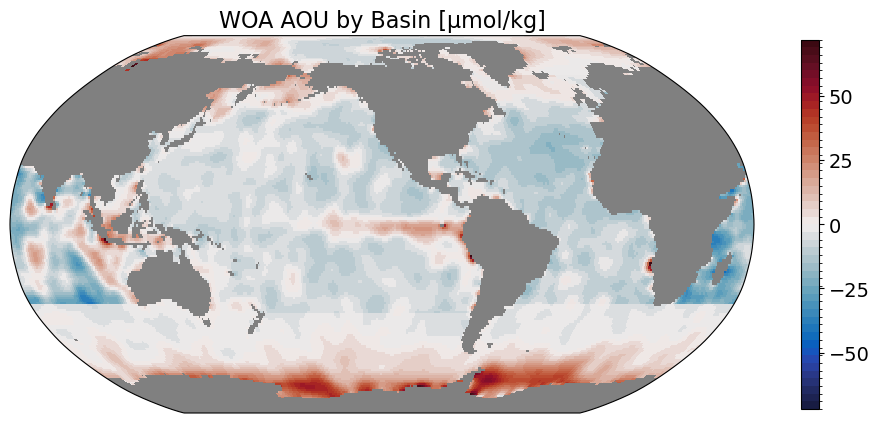

In [49]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

aouS = woa18_aou_southernocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouAr = woa18_aou_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouAt = woa18_aou_atlanticocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouP = woa18_aou_pacificocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouI = woa18_aou_indianocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(aouS, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU by Basin [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA AOU at 500 meters[μmol/kg]')

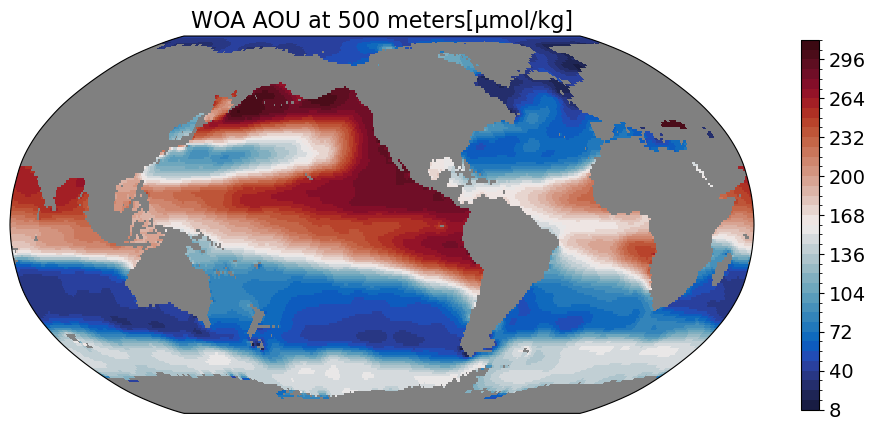

In [13]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2aou = woa18_aou.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)


# add separate colorbar
cb = plt.colorbar(o2aou, shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU at 500 meters[μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA AOU by Basin at 500 meters [μmol/kg]')

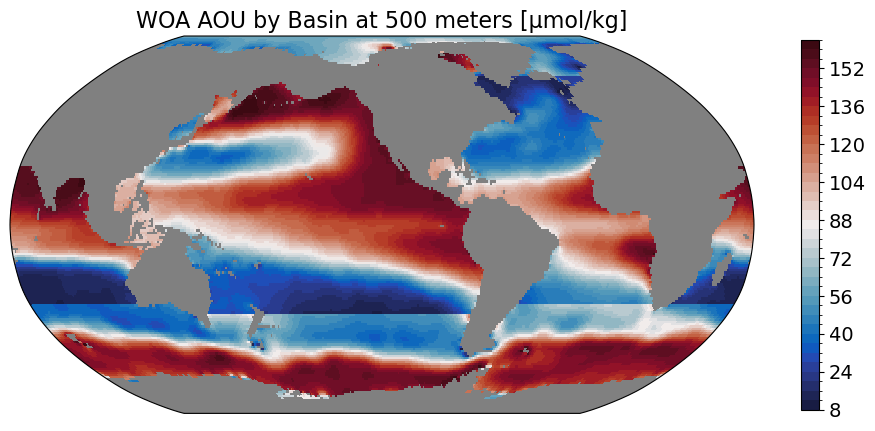

In [126]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

aouSd = woa18_aou_southernocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouArd = woa18_aou_arctic.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouAtd = woa18_aou_atlanticocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouPd = woa18_aou_pacificocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouId = woa18_aou_indianocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(aouSd, shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU by Basin at 500 meters [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 by Basin [μmol/kg]')

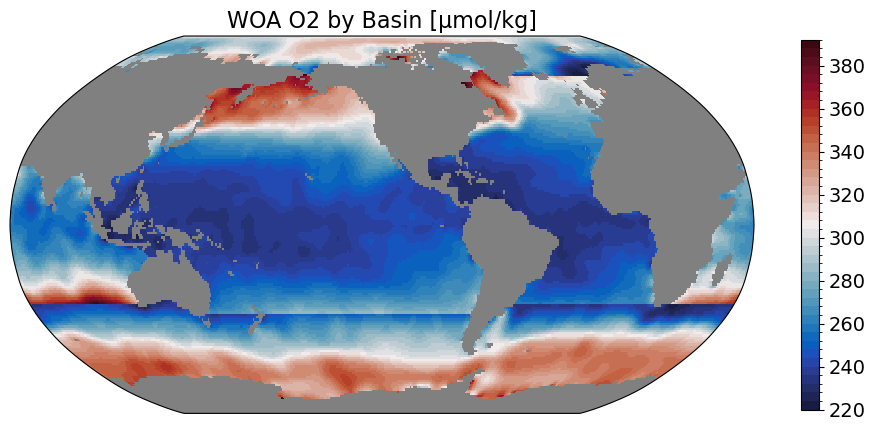

In [93]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2S = woa18_o2_southernocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2Ar = woa18_o2_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2At = woa18_o2_atlanticocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2P = woa18_o2_pacificocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2I = woa18_o2_indianocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2S, shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 by Basin [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 by Basin [μmol/kg]')

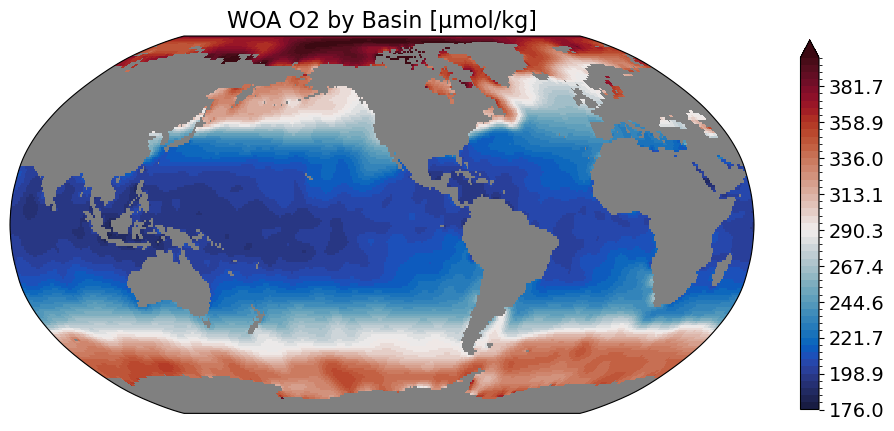

In [12]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2all1 = woa18_o2.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=176, vmax=400, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)


# add separate colorbar
cb = plt.colorbar(o2all1, shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 by Basin [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 by Basin at 500 meters [μmol/kg]')

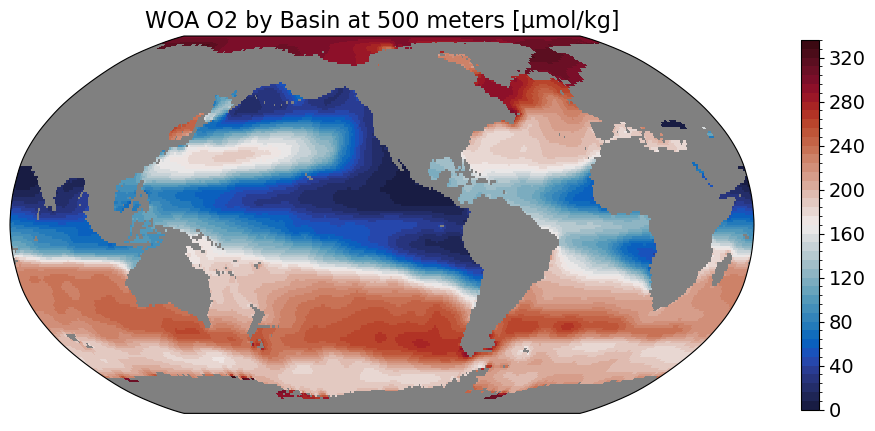

In [9]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2all = woa18_o2.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)


# add separate colorbar
cb = plt.colorbar(o2all, shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 by Basin at 500 meters [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 by Basin at 500 meters [μmol/kg]')

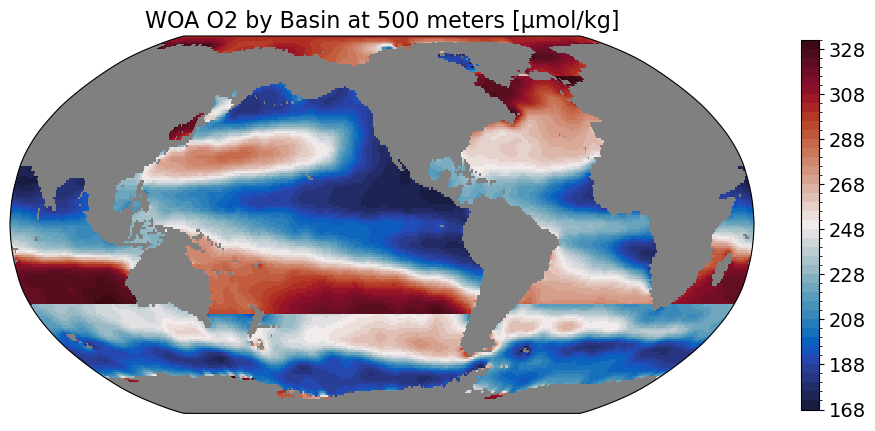

In [89]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2Sd = woa18_o2_southernocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2Ard = woa18_o2_arctic.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2Atd = woa18_o2_atlanticocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2Pd = woa18_o2_pacificocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2Id = woa18_o2_indianocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2Sd, shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 by Basin at 500 meters [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Sat by Basin [μmol/kg]')

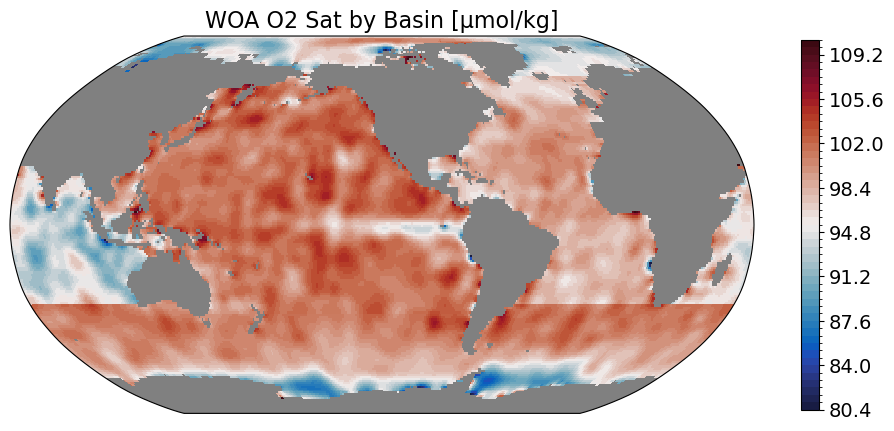

In [79]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2satS = woa18_o2sat_southernocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2satAr = woa18_o2sat_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2Asatt = woa18_o2sat_atlanticocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2satP = woa18_o2sat_pacificocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2satI = woa18_o2sat_indianocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2satS, shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat by Basin [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Sat by Basin (%)')

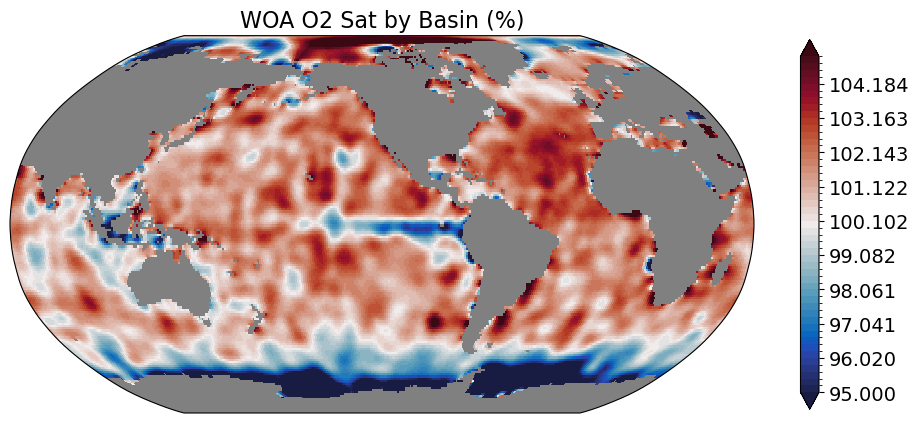

In [14]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2sat = woa18_o2_sat.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=95, vmax=105, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)


# add separate colorbar
cb = plt.colorbar(o2sat, shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat by Basin (%)",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Sat by Basin at 500 meters (%)')

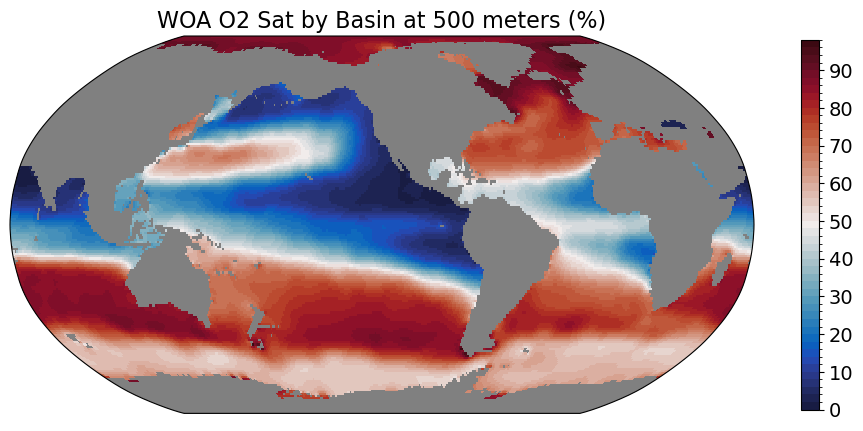

In [15]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2sat = woa18_o2_sat.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)


# add separate colorbar
cb = plt.colorbar(o2sat, shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat by Basin at 500 meters (%)",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Sat by Basin at 500 meters [μmol/kg]')

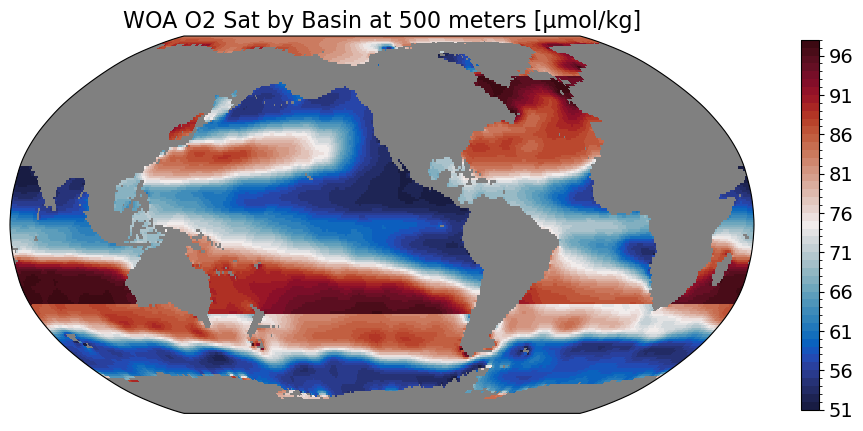

In [90]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2satSd = woa18_o2sat_southernocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2satArd = woa18_o2sat_arctic.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2Asattd = woa18_o2sat_atlanticocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2satPd = woa18_o2sat_pacificocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2satId = woa18_o2sat_indianocean.isel(depth=37).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2satSd, shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat by Basin at 500 meters [μmol/kg]",fontsize=16)

In [ ]:
Figure 3. World Maps of Dissolved Oxygen, Oxygen Saturation, and AOU at the Surface and at 500 Meters Depth. At the surface, there are not many identifiable patterns, except for El Nino off the Coast of South America and high Oxygen Saturation near the Antarctic Continent. At depths, these are distinct patterns: low dissolved oxygen and oxygen saturation at the equator, and higher at the poles, similar to Figure 2. Data to produce the figures above was taken from the World Ocean Atlas (WOA18) dataset. 

In [18]:
woa18_aou_atlanticocean = woa18_aou*atlanticocean
woa18_o2_atlanticocean = woa18_o2*atlanticocean
woa18_o2sat_atlanticocean = woa18_o2_sat*atlanticocean

Text(0.5, 1.0, 'WOA AOU Atlantic Ocean [μmol/kg]')

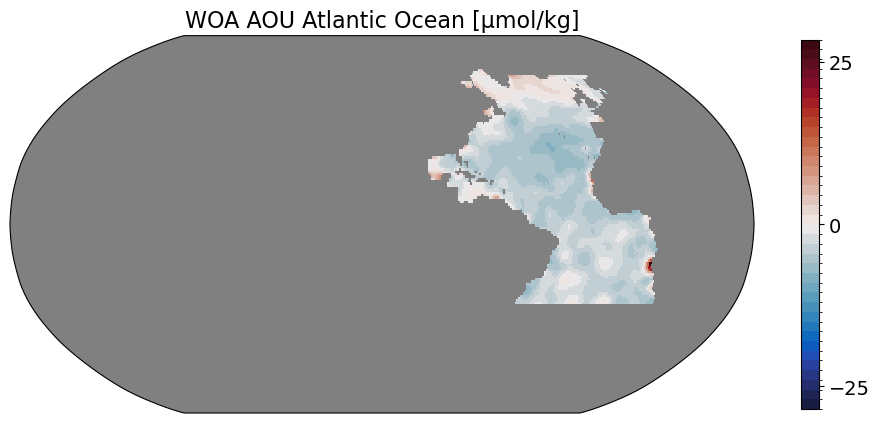

In [53]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])


aouAt = woa18_aou_atlanticocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(aouAt, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU Atlantic Ocean [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA AOU Atlantic Ocean [μmol/kg]')

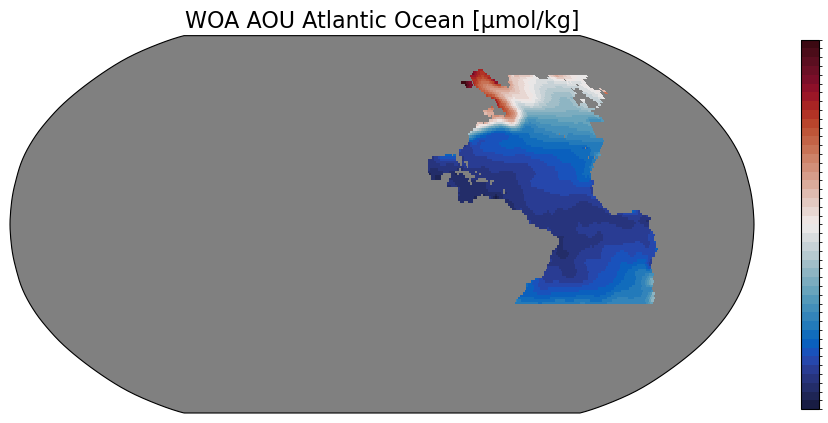

In [54]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])


o2At = woa18_o2_atlanticocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2At, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU Atlantic Ocean [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA AOU Atlantic Ocean [μmol/kg]')

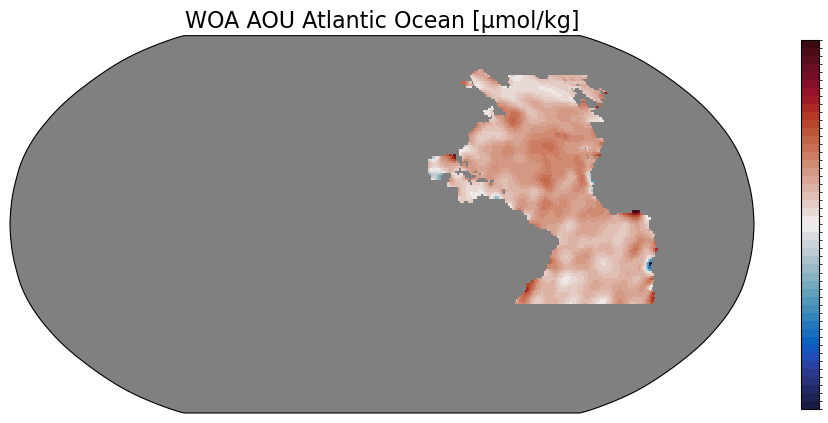

In [55]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])


o2satAt = woa18_o2sat_atlanticocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2satAt, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU Atlantic Ocean [μmol/kg]",fontsize=16)

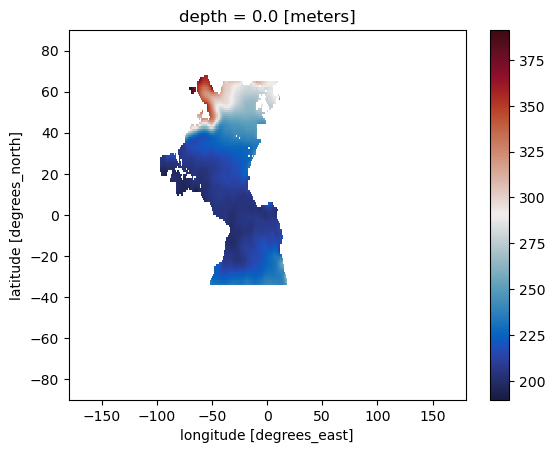

In [56]:
woa18_o2_atlanticocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

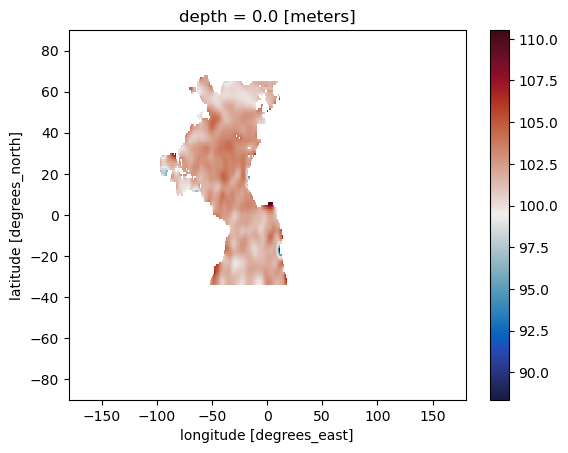

In [57]:
woa18_o2sat_atlanticocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

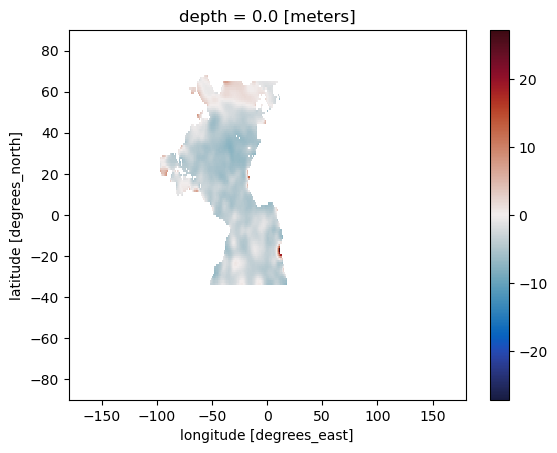

In [58]:
woa18_aou_atlanticocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [17]:
woa18_aou_pacificocean = woa18_aou*pacificocean
woa18_o2_pacificocean = woa18_o2*pacificocean
woa18_o2sat_pacificocean = woa18_o2_sat*pacificocean

Text(0.5, 1.0, 'WOA AOU by Basin [μmol/kg]')

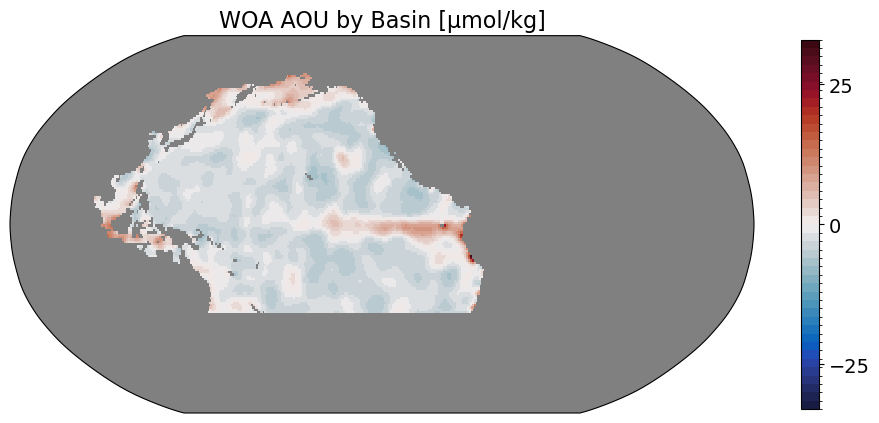

In [60]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])


aouP = woa18_aou_pacificocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(aouP, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU by Basin [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Pacific Ocean [μmol/kg]')

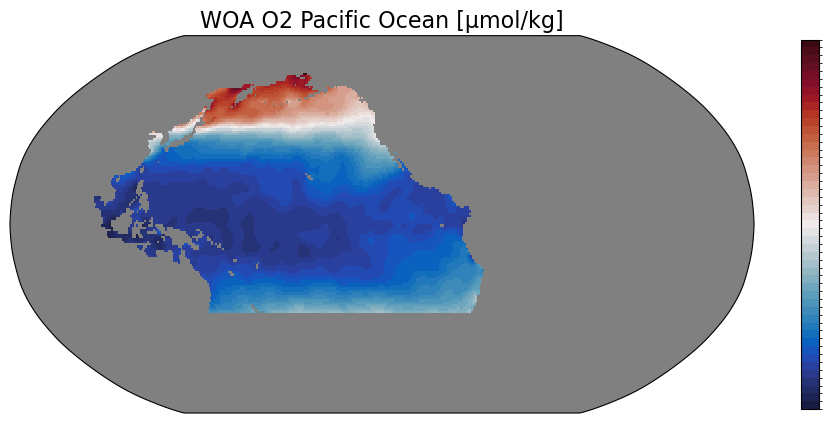

In [61]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])


o2P = woa18_o2_pacificocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2P, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Pacific Ocean [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 sat Pacific Ocean [μmol/kg]')

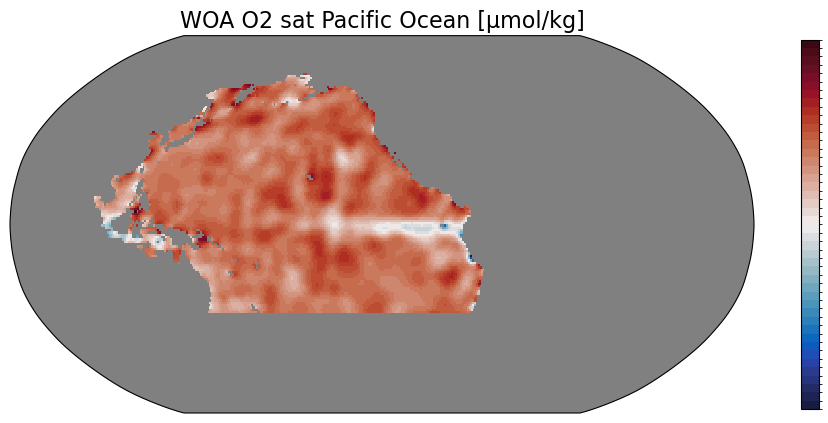

In [62]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])


o2satP = woa18_o2sat_pacificocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2satP, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 sat Pacific Ocean [μmol/kg]",fontsize=16)

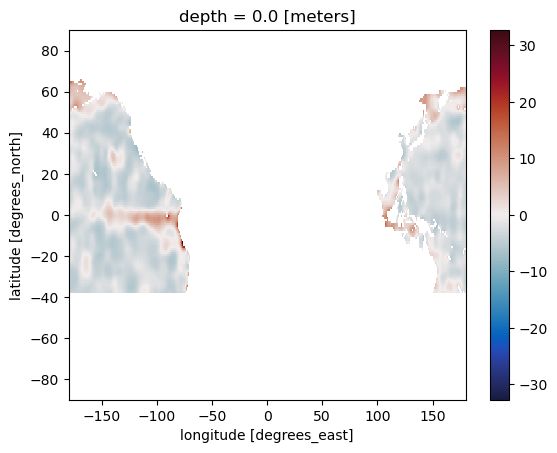

In [63]:
woa18_aou_pacificocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

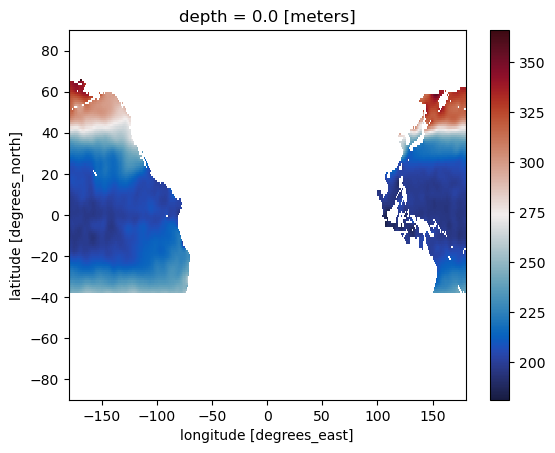

In [64]:
woa18_o2_pacificocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

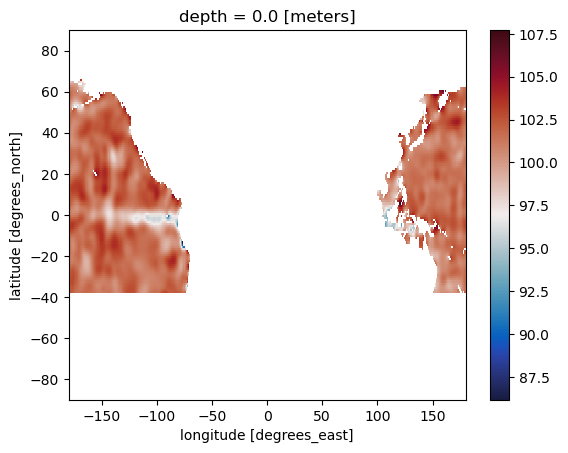

In [65]:
woa18_o2sat_pacificocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [16]:
woa18_aou_indianocean = woa18_aou*indianocean
woa18_o2_indianocean = woa18_o2*indianocean
woa18_o2sat_indianocean = woa18_o2_sat*indianocean

Text(0.5, 1.0, 'WOA AOU Indian Ocean [μmol/kg]')

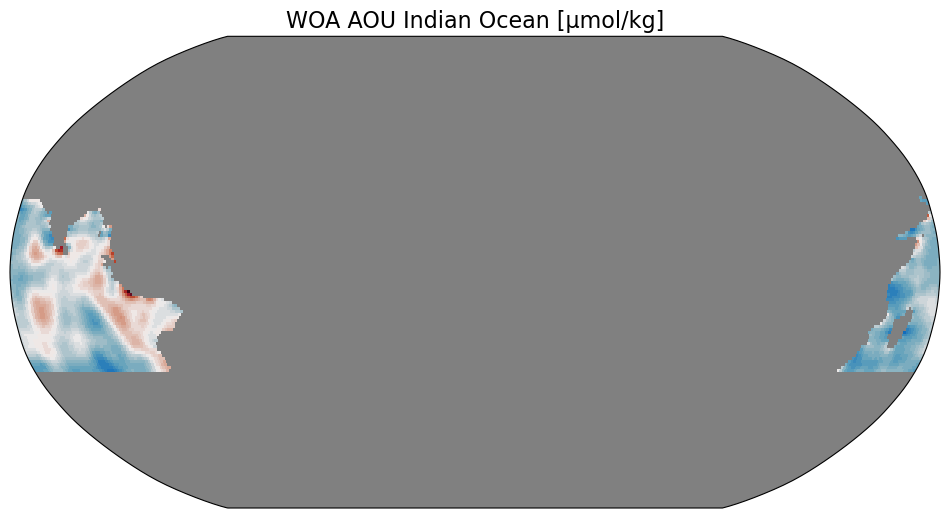

In [67]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])


AOUI = woa18_aou_indianocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2satP, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU Indian Ocean [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Indian Ocean [μmol/kg]')

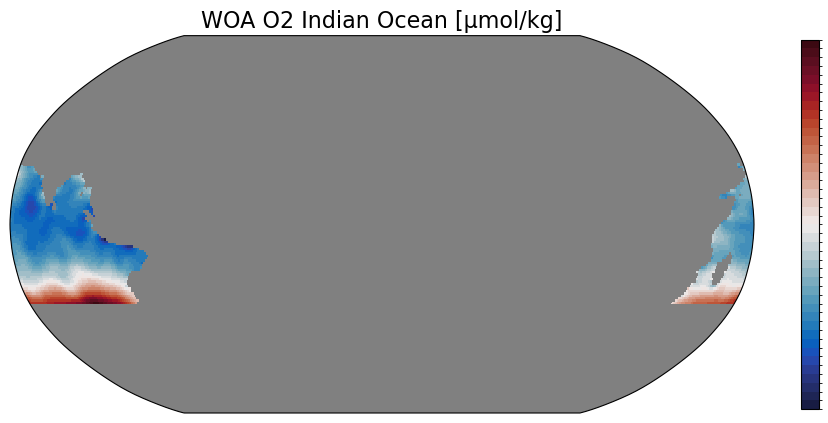

In [68]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])


o2I = woa18_o2_indianocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2I, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Indian Ocean [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Sat Indian Ocean [μmol/kg]')

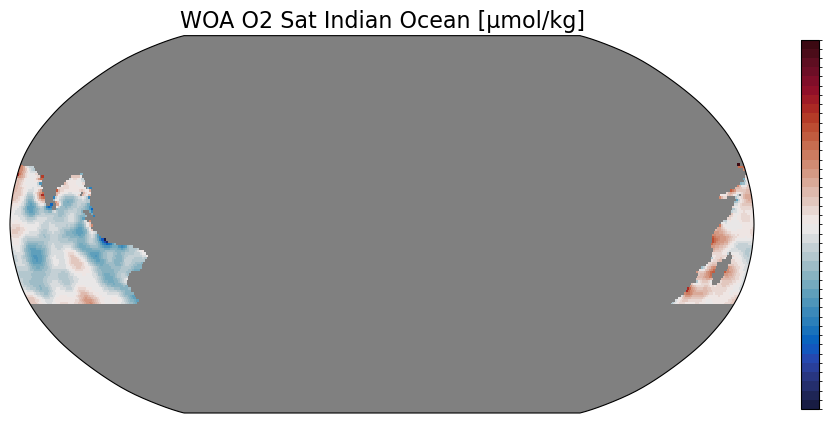

In [69]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])


o2satI = woa18_o2sat_indianocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2satI, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat Indian Ocean [μmol/kg]",fontsize=16)

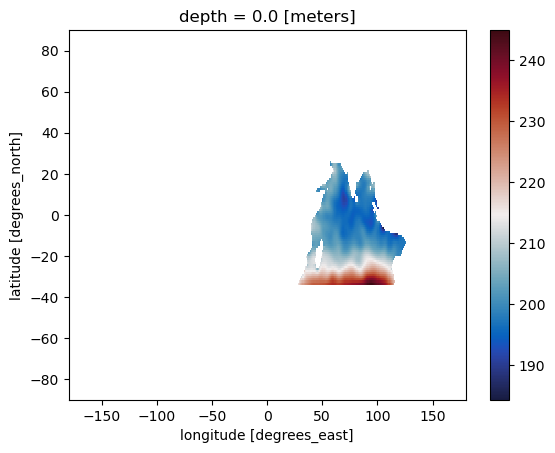

In [70]:
woa18_o2_indianocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

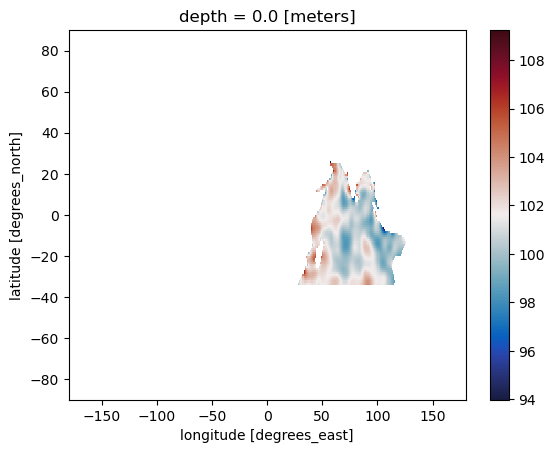

In [71]:
woa18_o2sat_indianocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

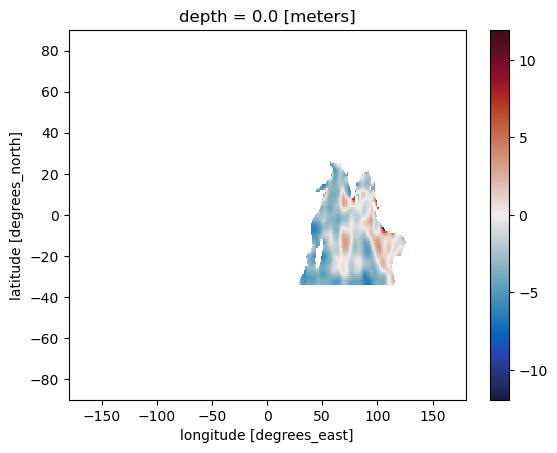

In [72]:
woa18_aou_indianocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [21]:
O2southern=woa18_o2_southernocean.mean(dim='lon').mean(dim='lat')
O2atlantic=woa18_o2_atlanticocean.mean(dim='lon').mean(dim='lat')
O2indian=woa18_o2_indianocean.mean(dim='lon').mean(dim='lat')
O2arctic=woa18_o2_arctic.mean(dim='lon').mean(dim='lat')
O2pacific=woa18_o2_pacificocean.mean(dim='lon').mean(dim='lat')

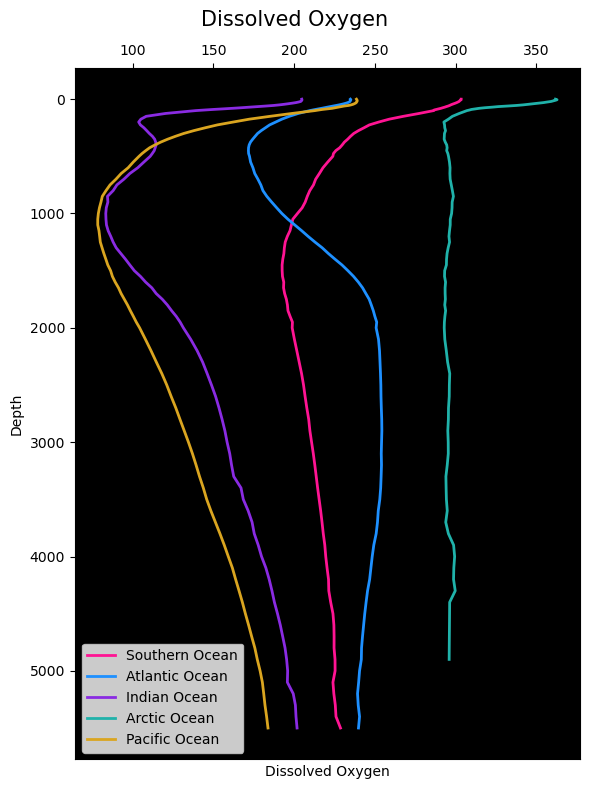

In [32]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 8))

fig.suptitle('Dissolved Oxygen', fontsize=15)

#ax.grid(color='lightgrey')

ax.plot( O2southern, O2southern['depth'], linewidth=2, label='Southern Ocean', color='deeppink')
ax.plot( O2atlantic, O2atlantic['depth'], linewidth=2, label='Atlantic Ocean', color='dodgerblue')
ax.plot( O2indian, O2indian['depth'], linewidth=2, label='Indian Ocean', color='blueviolet')
ax.plot( O2arctic, O2arctic['depth'], linewidth=2, label='Arctic Ocean', color='lightseagreen')
ax.plot( O2pacific, O2pacific['depth'], linewidth=2, label='Pacific Ocean', color='goldenrod')


ax.legend()
ax.set_ylabel('Depth')
ax.set_xlabel('Dissolved Oxygen')
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_facecolor('black')

plt.tight_layout()

In [25]:
O2satsouthern=woa18_o2sat_southernocean.mean(dim='lon').mean(dim='lat')
O2satatlantic=woa18_o2sat_atlanticocean.mean(dim='lon').mean(dim='lat')
O2satindian=woa18_o2sat_indianocean.mean(dim='lon').mean(dim='lat')
O2satarctic=woa18_o2sat_arctic.mean(dim='lon').mean(dim='lat')
O2satpacific=woa18_o2sat_pacificocean.mean(dim='lon').mean(dim='lat')

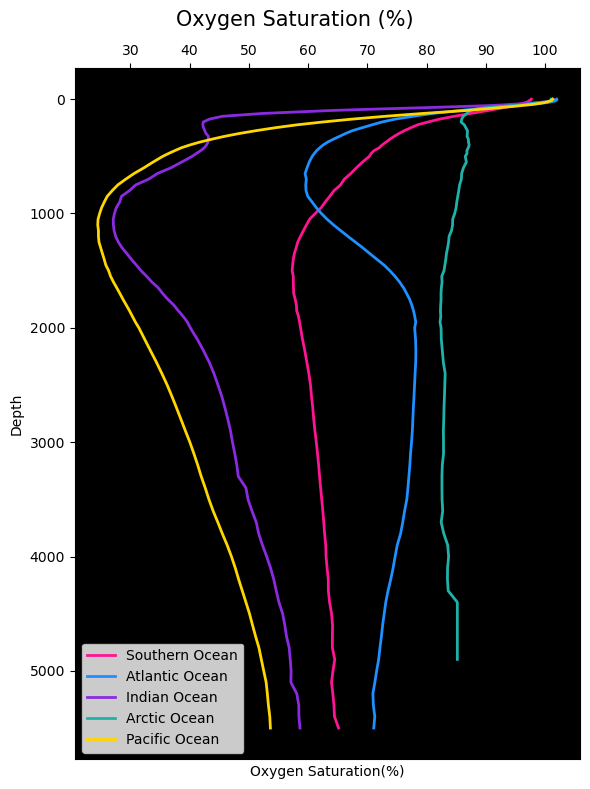

In [26]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 8))

fig.suptitle('Oxygen Saturation (%)', fontsize=15)

#ax.grid(color='lightgrey')

ax.plot(O2satsouthern, O2satsouthern['depth'], linewidth=2, label='Southern Ocean', color='deeppink')
ax.plot(O2satatlantic, O2satatlantic['depth'], linewidth=2, label='Atlantic Ocean', color='dodgerblue')
ax.plot(O2satindian, O2satindian['depth'], linewidth=2, label='Indian Ocean', color='blueviolet')
ax.plot(O2satarctic, O2satarctic['depth'], linewidth=2, label='Arctic Ocean', color='lightseagreen')
ax.plot(O2satpacific, O2satpacific['depth'], linewidth=2, label='Pacific Ocean', color='gold')


ax.legend()
ax.set_ylabel('Depth')
ax.set_xlabel('Oxygen Saturation(%)')
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_facecolor('black')

plt.tight_layout()

In [28]:
O2aousouthern=woa18_aou_southernocean.mean(dim='lon').mean(dim='lat')
O2aouatlantic=woa18_aou_atlanticocean.mean(dim='lon').mean(dim='lat')
O2aouindian=woa18_aou_indianocean.mean(dim='lon').mean(dim='lat')
O2aouarctic=woa18_aou_arctic.mean(dim='lon').mean(dim='lat')
O2aoupacific=woa18_aou_pacificocean.mean(dim='lon').mean(dim='lat')

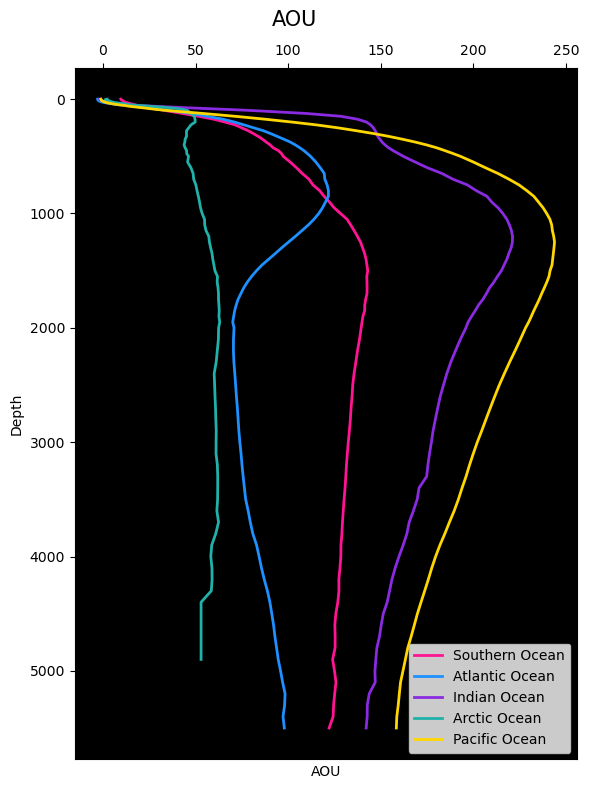

In [31]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 8))

fig.suptitle('AOU', fontsize=15)

#ax.grid(color='lightgrey')

ax.plot( O2aousouthern, O2aousouthern['depth'], linewidth=2, label='Southern Ocean', color='deeppink')
ax.plot( O2aouatlantic, O2aouatlantic['depth'], linewidth=2, label='Atlantic Ocean', color='dodgerblue')
ax.plot( O2aouindian, O2aouindian['depth'], linewidth=2, label='Indian Ocean', color='blueviolet')
ax.plot( O2aouarctic, O2aouarctic['depth'], linewidth=2, label='Arctic Ocean', color='lightseagreen')
ax.plot( O2aoupacific, O2aoupacific['depth'], linewidth=2, label='Pacific Ocean', color='gold')


ax.legend()
ax.set_ylabel('Depth')
ax.set_xlabel('AOU')
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_facecolor('black')

plt.tight_layout()

## Figure 1.  
    Apparent Oxygen Utilization (AOU), Oxygen Saturation, and Dissolved Oxygen of 5 Different Ocean Basins Across Depth. Latitude and Longitude were averaged to produce depth (in meters) vs oxygen measurement. AOU is in µm/kg, Oxygen saturation is in %, and Dissolved Oxygen is in µm/kg. Dissolved Oxygen and Oxygen Saturation content is highest in the Arctic, Atlantic, and Southern Oceans and lowest in the Indian and Pacific Ocean. However, the inverse is true for AOU, as the Indian and Pacific Ocean utilize the most oxygen. Data to produce the figure above was taken from the World Ocean Atlas (WOA18) dataset. 